## Programming of Data Analysis Project 1

**Francesco Troja**

***

Project 1

>Create a data set by simulating a real-world phenomenon of your choosing. Then rather than collect data related to the phenomenon, you should model and synthesise such data using Python.We suggest you use the numpy.random package for this purpose. Specifically, in this project you should:
>- Choose a real-world phenomenon that can be measured and for which you could collect at least one-hundred data points across at least four different variables.
>- Investigate the types of variables involved, their likely distributions, and their relationships with each other.
>- Synthesise/simulate a data set as closely matching their properties as possible.
>- Detail your research and implement the simulation in a Jupyter notebook – the data set itself can simply be displayed in an output cell within the notebook.


#### Installations

To execute this project, several Python libraries have been utilized. These libraries were chosen for their specific functionalities and capabilities, tailored to the requirements of the project:
1. `padas`: The library's powerful data structures, including DataFrames and Series, allowed for efficient organization and structuring of data, making it easy to perform various data operations, such as filtering, grouping, and aggregating.Pandas offered a wide range of functions for data cleaning and preparation, making it ideal for addressing real-world data challenges[1].
2. `matplotlib.pyplot`: It is a widely used library for data visualization in Python. It provides a flexible and comprehensive set of tools to create various types of plots and charts. Its versatility allows to create bar charts, line plots, scatter plots, histograms, and more, making it an essential tool for exploratory data analysis and presentation of findings[2].
3. `numpy`: It is imported in this context for its extensive capabilities in numerical and statistical operations. Numpy provides a wide range of probability distributions, functions for generating random numbers following these distributions, and tools for statistical calculations[3].
4. `scipy.stats`: It includes an extensive array of statistical functionalities, covering various aspects of probability and data analysis. It includes a diverse set of probability distributions, facilitating the modeling of different random variables. Moreover, the module provides tools for generating summary and frequency statistics, allowing for a comprehensive understanding of dataset characteristics[4].

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import multinomial

#### Importing the Dataset

The provided dataset offers an extensive and detailed record of property house prices in Ireland, spanning the period from 2010 to 2023. It plays a significant role in capturing essential information about the real estate market in Ireland. This dataset provides valuable insights into the dynamics of property prices, trends, and fluctuations over a thirteen-year period. The housing market is a crucial element of a country's economy, and property prices reflect not only home values but also broader economic conditions, as well as the forces of supply and demand at play.

The dataset includes a wide range of variables, including the date of sale, property location, property type, and the sale price. These variables offer a rich source of information for analysis, allowing for the examination of various aspects of the property market, such as regional variations, property types, and the impact of economic events on house prices.

The dataset used was was discovered on the [Kaggle](https://www.kaggle.com/datasets/raphaelmapp/ireland-house-prices-2010-to-2023/code) website.

In Python, working with CSV files often involves using the `read_csv()` function from the Pandas library. This function acts as a crucial tool, facilitating the smooth import of CSV files into a Pandas DataFrame. The DataFrame represents the data in a structured format, enabling easy manipulation and analysis. The DataFrame format, offered by Pandas, facilitates straightforward data exploration, manipulation, and analysis. In order to import the csv file, the file path is passed as parameter. This file path specifies the location of the CSV file you want to import. The read_csv() function then reads the data from that file and converts it into a Pandas DataFrame[5].

In [23]:

df = pd.read_csv("Housing_Data_Jan2010_to_May2023_Cleaned.csv")

print (f'The dataset used is:\n {df}')

The dataset used is:
               Date                                            Address  \
0       28/11/2018             ABBEY GLEN, OFF POTTERY RD, CABINTEELY   
1       15/12/2016                   WALFORD, SHREWSBURY RD, DUBLIN 4   
2       29/03/2013                 Walford, Shrewsbury Road, Dublin 4   
3       19/05/2021                     Uimhi a Naoi, B�tha Sri�sbaire   
4       20/11/2019  Property at Castletown Demesne, Carrick-on-Sui...   
...            ...                                                ...   
597523         NaN                                                NaN   
597524         NaN                                                NaN   
597525         NaN                                                NaN   
597526         NaN                                                NaN   
597527         NaN                                                NaN   

          County       Price  Full_Market_Price  VAT_Exclusive  \
0         Dublin  14800000.0       

#### Data Exploration

Let's investigate the dataset's  structure and characteristics. Statistical analysis is a method for uncovering patterns and correlations in data. The goal is to provide a descriptive overview of the dataset and its variables. Let's have a look at the dataset's contents:

- The Pandas `head()` method is used to return the top n (default is 5) rows from a dataset.
- The Pandas `tail()` method is used to return the bottom n (default is 5) rows from a dataset[6].


In [24]:
print("the first 5 rows of the dataset:\n")
df.head()


the first 5 rows of the dataset:



,Date,Address,County,Price,Full_Market_Price,VAT_Exclusive,Description_of_Property,Property_Size_Description
0,28/11/2018,"ABBEY GLEN, OFF POTTERY RD, CABINTEELY",Dublin,14800000.0,0.0,0.0,Second-Hand Dwelling house /Apartment,No Description
1,15/12/2016,"WALFORD, SHREWSBURY RD, DUBLIN 4",Dublin,14250000.0,0.0,0.0,Second-Hand Dwelling house /Apartment,No Description
2,29/03/2013,"Walford, Shrewsbury Road, Dublin 4",Dublin,14000000.0,0.0,0.0,Second-Hand Dwelling house /Apartment,No Description
3,19/05/2021,"Uimhi a Naoi, B�tha Sri�sbaire",Dublin,13250000.0,0.0,0.0,Second-Hand Dwelling house /Apartment,No Description
4,20/11/2019,"Property at Castletown Demesne, Carrick-on-Sui...",Kilkenny,12600000.0,0.0,0.0,Second-Hand Dwelling house /Apartment,No Description


In [25]:
print("the last 5 rows of the dataset:\n")
df.tail()

the last 5 rows of the dataset:



,Date,Address,County,Price,Full_Market_Price,VAT_Exclusive,Description_of_Property,Property_Size_Description
597523,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
597524,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
597525,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
597526,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
597527,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


As evident from the provided code, the selected dataset comprises 597,527 rows and 8 columns. Additionally, it's apparent from this initial analysis that the dataset contains missing values. The dimensionality of the dataset, can be confirmed using the Pandas function `shape` that when used it returns a tuple where the first element represents the number of rows (observations) and the second element indicates the number of columns (variables) in the dataset[7].

In [26]:
print('The dimensions of the dataset are:\n')
df.shape

The dimensions of the dataset are:



(597528, 8)

To gain further insights into the DataFrame, the `info()` function can be used. This function provides metadata about the DataFrame, including the column names, the count of non-null values in each column, and the data type for each column[8]:

In [27]:
print('Find below the full summary of the Dataset:\n')
df.info()

Find below the full summary of the Dataset:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 597528 entries, 0 to 597527
Data columns (total 8 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   Date                       596655 non-null  object 
 1   Address                    596655 non-null  object 
 2   County                     596655 non-null  object 
 3   Price                      596655 non-null  float64
 4   Full_Market_Price          596644 non-null  float64
 5   VAT_Exclusive              596644 non-null  float64
 6   Description_of_Property    596644 non-null  object 
 7   Property_Size_Description  596655 non-null  object 
dtypes: float64(3), object(5)
memory usage: 36.5+ MB


The analysis of the dataset reveals the following key findings:

1. The dataset consists of 8 columns:

    - Date: Date property was sold
    - Address
    - County
    - Price: Price of the property in euros
    - Full_market_price: Indicates whether the full market price was paid or not.
    - VAT_Exclusive: '1' indicates yes. If property is new, then vat is excluded.
    - Description_of_Property
    - Property_Size_Description

2. It is apparent that there are missing values present in some of the columns.
3. The dataset is composed of a mix of data types. Specifically, there are 5 columns with object data types (string of Text or mixed numeric and non-numeric values) and 3 numerical columns(Floating point numbers), which likely contain numeric information[9].

The analysis highlights an issue with the "date" column being stored as an object data type, which limits its utility for datetime operations. To resolve this, converting the "date" column to the datetime64 data type is necessary. The `to_datetime()` function, a part of Pandas, serves this purpose. By using this function, the "date" column can be transformed into a format that enables effective datetime operations on the dataset[10]. 


In [28]:
# there is an error in row 513, usig replace to adjust it
old_text = "/11/262021"
new_text = "26/11/2021"

df['Date'] = df['Date'].replace(old_text, new_text)

In [29]:
#convert Date into datatimes type
df["Date"] = pd.to_datetime(df["Date"], dayfirst=True, format='%d/%m/%Y')

df["Date"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 597528 entries, 0 to 597527
Series name: Date
Non-Null Count   Dtype         
--------------   -----         
596655 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 4.6 MB


As observed in the previous examination using the tail() function, it became apparent that there are entire rows containing null values in the dataset.To determine the precise count of rows with null values, `isnull()` function can be used. The function identifies and flags the presence of missing or null values in the dataset. This understanding is essential before proceeding with further data analysis and allows for informed decision-making regarding how to handle these null value rows[11].

In [30]:
#Taking Date Variable as references
df[df['Date'].isnull()]

,Date,Address,County,Price,Full_Market_Price,VAT_Exclusive,Description_of_Property,Property_Size_Description
596655,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
596656,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
596657,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
596658,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
596659,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
597523,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
597524,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
597525,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
597526,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Upon analysis, it's evident that the total number of rows containing null values amounts to 873. Given that these rows do not contain any valuable information, the next step involves removing them from the dataset. The function `drop()` is used for this purpose, which eliminates rows based on their index values. Typically, the index value represents a 0-based integer value assigned to each row. By specifying the row index, it can be deleted from the dataset[12].

In [31]:
#using inplace to change the dataset
df.drop(df.index[596655:597528], inplace= True)
df.tail()

,Date,Address,County,Price,Full_Market_Price,VAT_Exclusive,Description_of_Property,Property_Size_Description
596650,2018-09-04,"65 ST JOSEPH'S PARK, NENAGH, CO TIPPERARY",Tipperary,5080.00,0.0,0.0,Second-Hand Dwelling house /Apartment,No Description
596651,2014-07-18,"CLOGHAN, GLENCOLMCILLE, DONEGAL",Donegal,5079.00,0.0,0.0,Second-Hand Dwelling house /Apartment,No Description
596652,2012-01-11,"Loghnabradden, Fintown, Co. Donegal",Donegal,5079.00,1.0,0.0,Second-Hand Dwelling house /Apartment,No Description
596653,2019-03-11,"COULAGHARD, EYERIES, BEARA",Cork,5030.53,0.0,0.0,Second-Hand Dwelling house /Apartment,No Description
596654,2023-01-10,"14 KNIGHTS PARK, CASTLEBAR, MAYO",Mayo,5001.00,1.0,0.0,Second-Hand Dwelling house /Apartment,No Description


The analysis will now shift to examining the missing values within the variables of the dataset. To determine of many missing values exist for each variable the `sum()` function can be chained on the `isnull()`[13].

In [32]:
print('The missing values are:\n')
df.isnull().sum()

The missing values are:



Date                          0
Address                       0
County                        0
Price                         0
Full_Market_Price            11
VAT_Exclusive                11
Description_of_Property      11
Property_Size_Description     0
dtype: int64

The result of this analysis reveals that out of the 8 variables in the dataset, 5 of them contain missing values. Specifically, the "Full_Market_Price," "VAT_Exclusive," and "Description_of_Property" variables each have 11 missing values. Indeed, the approach to handling missing values depends on the specific analysis or task at hand. Identifying and understanding the nature of missing data is a critical aspect of data preparation. Depending on the goals of the analysis, various actions can be taken with missing values, including imputation (filling in missing values with estimated or calculated data) or employing data cleaning techniques to ensure the dataset's quality and suitability for the intended analysis[14].

#### Statistical information

In the process of analyzing a dataset, a crucial initial step involves determining the type of variable associated with each attribute. One fundamental property of variables is their level or scale of measurement, which dictates the permissible arithmetic operations and, consequently, specifies the applicable statistical tests. In statistics, there are four primary levels of measurement: **nominal**, **ordinal**, **interval**, and **ratio**. These levels are hierarchical, with each level possessing all the characteristics of the previous levels, and some additional features[15].

- Nominal Scale: This is the lowest level of measurement, indicating that variables possess distinct values, but no meaningful order can be established among them. When there are only two categories, such as gender, it is referred to as dichotomous or binary.
- Ordinal Scale: Positioned one level higher, the ordinal scale encompasses nominal information but allows for the establishment of a ranking. However, the distances between values are not interpretable, making it impossible to quantify the absolute distance between two values[16].

Variables with a nominal or ordinal scale are often termed categorical variables while Variables with ordinal,interval and Ratio scale are Continuous Variable[16].

- Ordinal variables, categorize information with a clear sense of order or ranking. However, it's important to emphasize that the intervals or gaps between these categories are not uniform or quantifiable. For example, consider customer satisfaction ratings such as "poor," "fair," "good," and "excellent." While these categories can be ranked, the differences between them are not consistent and cannot be precisely measured. Ordinal scales allow for the establishment of a ranking, indicating higher or lower positions, but they do not provide a basis for making detailed numerical comparisons[17].
- Interval Variables: This category permits the application of a wide array of statistical measures. However, it's essential to note that these measures cannot assume the existence of a 'true' zero point. On an interval scale, the zero point is a matter of convention rather than an absolute marker. For instance, Centigrade and Fahrenheit temperature scales both exhibit equal intervals of temperature defined by considering equal volumes of expansion. Yet, each scale establishes an arbitrary zero point, and numerical values from one scale can be translated into equivalent values on the other using a specific mathematical equation. The critical idea is that interval variables maintain their properties regardless of the choice of the zero point, as long as consistent transformations are applied[18].
- Ratio Variables: Representing the highest level of precision among all scales, ratio data is a subset of quantitative data. Unlike interval data, ratio data possesses a distinctive attribute: the presence of a "true zero." A zero measurement on a ratio scale is absolute, signifying that ratio data can never be negative. This characteristic enables the full range of mathematical operations, including addition, subtraction, multiplication, and division, during statistical analyses[19].



#### Categorical Variables

For categorical data, a common summary measure is the count of observations for a specific category or percentage that each category contributes to the entire dataset. To visually represent this information, a frequency table can be utilized, often accompanied by a bar chart or pie chart. A frequency table displays the occurrence of each unique value within a column, providing both tabular and graphical representations[20].

To identify the distinct values of categorical variables within the dataset, the Pandas `unique()` function can be employed. This function returns an array containing the unique values found in a specified column. For instance[21]:

In [33]:
# create a list that includes all the categorical variables
cat_var = ['Address', 'County', 'Description_of_Property', 'Property_Size_Description', ]

for variable in cat_var:
    unique_value = df[variable].unique()
    print(f'\nUnique {variable} in the dataset:\n', unique_value)


Unique Address in the dataset:
 ['ABBEY GLEN, OFF POTTERY RD, CABINTEELY'
 'WALFORD, SHREWSBURY RD, DUBLIN 4' 'Walford, Shrewsbury Road, Dublin 4'
 ... 'Loghnabradden, Fintown, Co. Donegal' 'COULAGHARD, EYERIES, BEARA'
 '14 KNIGHTS PARK, CASTLEBAR, MAYO']

Unique County in the dataset:
 ['Dublin' 'Kilkenny' 'Laois' 'Cork' 'Wicklow' 'Louth' 'Kildare' 'Limerick'
 'Tipperary' 'Clare' 'Meath' 'Galway' 'Wexford' 'Cavan' 'Kerry' 'Carlow'
 'Westmeath' 'Waterford' 'Sligo' 'Donegal' 'Mayo' 'Longford' 'Monaghan'
 'Roscommon' 'Leitrim' 'Offaly']

Unique Description_of_Property in the dataset:
 ['Second-Hand Dwelling house /Apartment' 'New Dwelling house /Apartment'
 'Teach/�ras�n C�naithe Ath�imhe' 'Teach/�ras�n C�naithe Nua' nan
 'Teach/?ras?n C?naithe Nua']

Unique Property_Size_Description in the dataset:
 ['No Description' 'greater than 125 sq metres'
 'greater than or equal to 38 sq metres and less than 125 sq metres'
 'greater than or equal to 125 sq metres' 'less than 38 sq metres'
 'n�os

The output above reveals an issue where the "Description_of_Property" and "Property_Size_Description" attributes contain gibberish text. Further analysis, facilitated by the English-Gaelic translator ([focloir](https://www.focloir.ie/en/dictionary/ei/dwelling+house)), indicates that this gibberish text corresponds to the Gaelic version of the English text. To enhance the clarity of the dataset for analysis, it is preferable to remove the Gaelic version and replace it with the English equivalent. The `replace()` function will be employed for this purpose[22].

In [34]:
# create a dictionary of substrings as key-value pairs
char_to_replace = {
    "n?os l? n? 38 m?adar cearnach": "less than 38 sq metres",
    "Teach/?ras?n C?naithe Nua": "Second-Hand Dwelling house /Apartment",
    "Teach/�ras�n C�naithe Nua": "Second-Hand Dwelling house /Apartment",
    "Teach/�ras�n C�naithe Ath�imhe": "New Dwelling house /Apartment",
    "n�os m� n� n� cothrom le 38 m�adar cearnach agus n�os l� n� 125 m�adar cearnach": 'greater than or equal to 38 sq metres and less than 125 sq metres'
}

for old_text, new_text in char_to_replace.items():
    df['Property_Size_Description'] = df['Property_Size_Description'].replace(old_text, new_text)
    df['Description_of_Property'] = df['Description_of_Property'].replace(old_text, new_text)

let's move on with the analysis. To obtain the count of unique values for a categorical variable, the function [`value_counts()`](https://pandas.pydata.org/docs/reference/api/pandas.Series.value_counts.html) can be used. This function provides a series containing counts of unique values in descending order.

In [35]:
cat_var = ['County', 'Address', 'Description_of_Property', 'Property_Size_Description']

for variable in cat_var:
    count = df[variable].value_counts()
    print (f'\nValue counts for column:\n {count}')


Value counts for column:
 County
Dublin       187631
Cork          65146
Kildare       31566
Galway        29595
Meath         24352
Limerick      22183
Wexford       20782
Wicklow       19097
Kerry         17077
Waterford     16328
Donegal       16312
Louth         16156
Tipperary     16105
Mayo          14377
Clare         13648
Westmeath     11470
Kilkenny       9347
Laois          9341
Cavan          9129
Sligo          8942
Roscommon      8659
Offaly         7442
Carlow         6634
Leitrim        5398
Longford       5196
Monaghan       4742
Name: count, dtype: int64

Value counts for column:
 Address
HILLQUARTER, COOSAN, ATHLONE                     15
KILLARNEY RD, ABBEYFEALE, LIMERICK               14
FRIARSTOWN, GRANGE, KILMALLOCK                   13
ROCK RD, BLACKROCK, DUNDALK                      12
RAMPARK, JENKINSTOWN, DUNDALK                    11
                                                 ..
14 CARLINN GARDENS, MULLAHARLIN ROAD, DUNDALK     1
26 CARLINN AVENUE, MU

To better organize the analysis and focus on specific information, a subset of the dataset will be selected. This subset will encompass data recorded between January 1, 2020 and December 31, 2023, and will specifically include entries from four major Irish counties: Dublin, Cork, Galway, and Limerick[23].

In [36]:
start_date = '2018-01-01'
end_date = '2023-12-31'
sel_count = ['Dublin', 'Cork', 'Galway', 'Limerick']

# Filter the dataset
# isin: Include rows where County is in the selected list
new_df = df[(df['Date'] >= start_date) & (df['Date'] <= end_date) & (df['County'].isin(sel_count))]

new_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 151052 entries, 0 to 596653
Data columns (total 8 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   Date                       151052 non-null  datetime64[ns]
 1   Address                    151052 non-null  object        
 2   County                     151052 non-null  object        
 3   Price                      151052 non-null  float64       
 4   Full_Market_Price          151052 non-null  float64       
 5   VAT_Exclusive              151052 non-null  float64       
 6   Description_of_Property    151052 non-null  object        
 7   Property_Size_Description  151052 non-null  object        
dtypes: datetime64[ns](1), float64(3), object(4)
memory usage: 10.4+ MB


The new dataset just contain 151051 rows and there are no Null Value. This wil provide a more manageable and targeted dataset for subsequent analyses.

Now, let's proceed to visualize the distribution of categorical data by plotting a pie chart. This graphical representation will illustrate the percentage contribution of each category to the overall dataset.

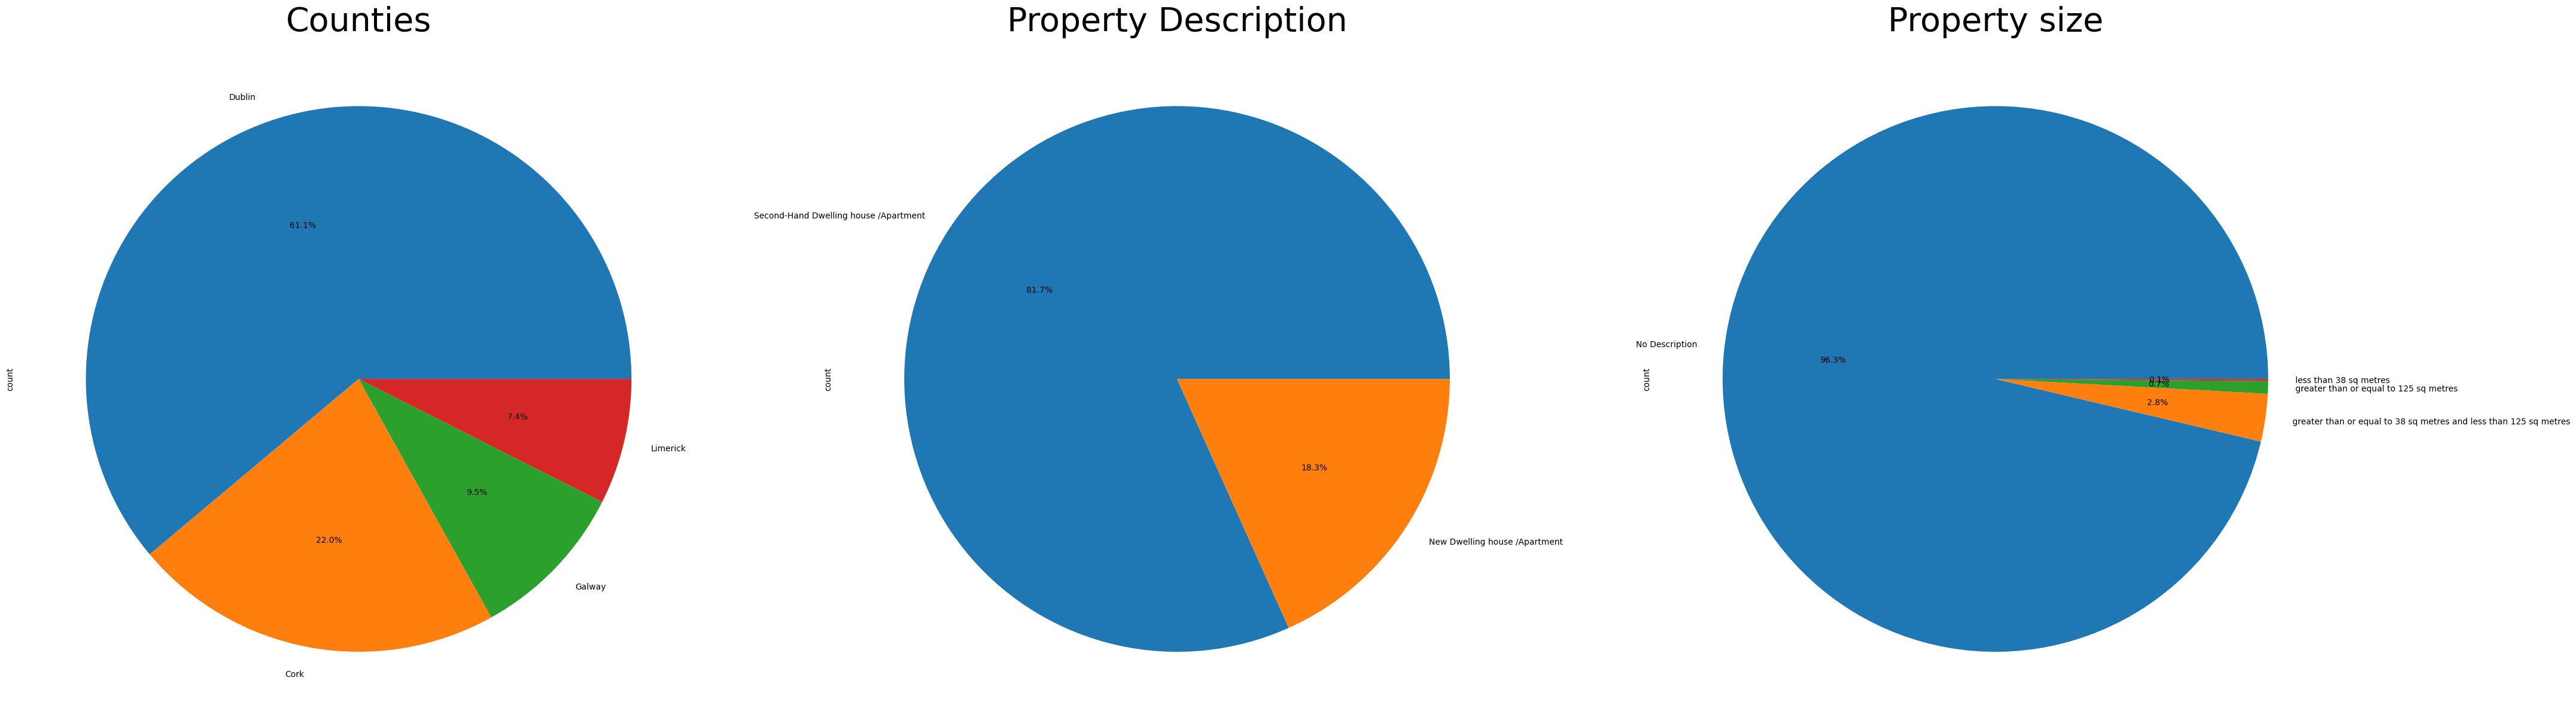

In [37]:
county_value = new_df.County.value_counts()
desc_prop_value = new_df.Description_of_Property.value_counts()
size_prop_value = new_df.Property_Size_Description.value_counts()

fig = plt.figure(figsize=(50, 25)) # create a figure with a 50 width, 25 length

ax1 = plt.subplot(131) #subplot with 1 row, 3 columns the 1st one
ax2 = plt.subplot(132) #subplot with 1 row, 3 columns the 2nd one
ax3 = plt.subplot(133) #subplot with 1 row, 3 columns the 3rd one

county_value.plot(kind='pie', x=county_value, y = county_value.index, autopct='%1.1f%%', ax= ax1)
desc_prop_value.plot(kind='pie', x=desc_prop_value, y = desc_prop_value.index, autopct='%1.1f%%', ax= ax2)
size_prop_value.plot(kind='pie', x=size_prop_value, y = size_prop_value.index, autopct='%1.1f%%', ax= ax3)
ax1.set_title('Counties',  fontsize=40)
ax2.set_title('Property Description',  fontsize=40)
ax3.set_title('Property size', fontsize=40)
plt.savefig("percentage of categorical variable")
plt.show()


The two primary probability distributions commonly used for categorical variables are the binomial and multinomial distributions. The binomial distribution is used in scenarios involving binary categorical variables, where only two potential outcomes, such as success or failure, exist. On the other hand, the multinomial distribution exhibits greater versatility and finds application in situations where categorical variables include more than two categories. This flexibility allows the multinomial distribution to model the probabilities associated with various outcomes within a single trial, making it well-suited for scenarios involving multiple categories[24].

The multinomial distribution key characteristics and properties:
- Fixed Number of Trials $n$;
- Probability Vector $P$ where each element in the vector represents the probability of one of the possible outcomes;
- Tals are independent of each other meaning that the outcome of one trial does not affect the outcomes of subsequent trials.

The result of the multinomial distribution provides a simulated random sample of occurrences for each category based on the specified probabilities. Each row in the resulting dataset corresponds to a category, and the "Observed" column represents the number of occurrences for each category in the simulated sample[25].


In [38]:
from scipy.stats import multinomial

county_counts = new_df['County'].value_counts()
county_probabilities = (new_df['County'].value_counts() / len(new_df)).values

num_trials = 1000

# Calculate the probability for each County category
multinomial = np.random.multinomial(num_trials, county_probabilities)

# Create a DataFrame to display the results
result_df = pd.DataFrame({'County': county_counts.index, 'Observed': multinomial})

# Print the result
print(result_df)

     County  Observed
0    Dublin       599
1      Cork       237
2    Galway        89
3  Limerick        75


In [39]:
prop_size_counts = new_df['Property_Size_Description'].value_counts()
prop_size_probabilities = (new_df['Property_Size_Description'].value_counts() / len(new_df)).values

num_trials = 1000  # You can adjust this to your preference

# Calculate the probability for each Property_Size_Description category
multinomial = np.random.multinomial(num_trials, prop_size_probabilities)

result_df = pd.DataFrame({'Property_Size_Description': prop_size_counts.index, 'Observed': multinomial})
print(result_df)


                           Property_Size_Description  Observed
0                                     No Description       962
1  greater than or equal to 38 sq metres and less...        30
2             greater than or equal to 125 sq metres         8
3                             less than 38 sq metres         0


let's now vidualize the multinomial distribution of the two categorical variables:

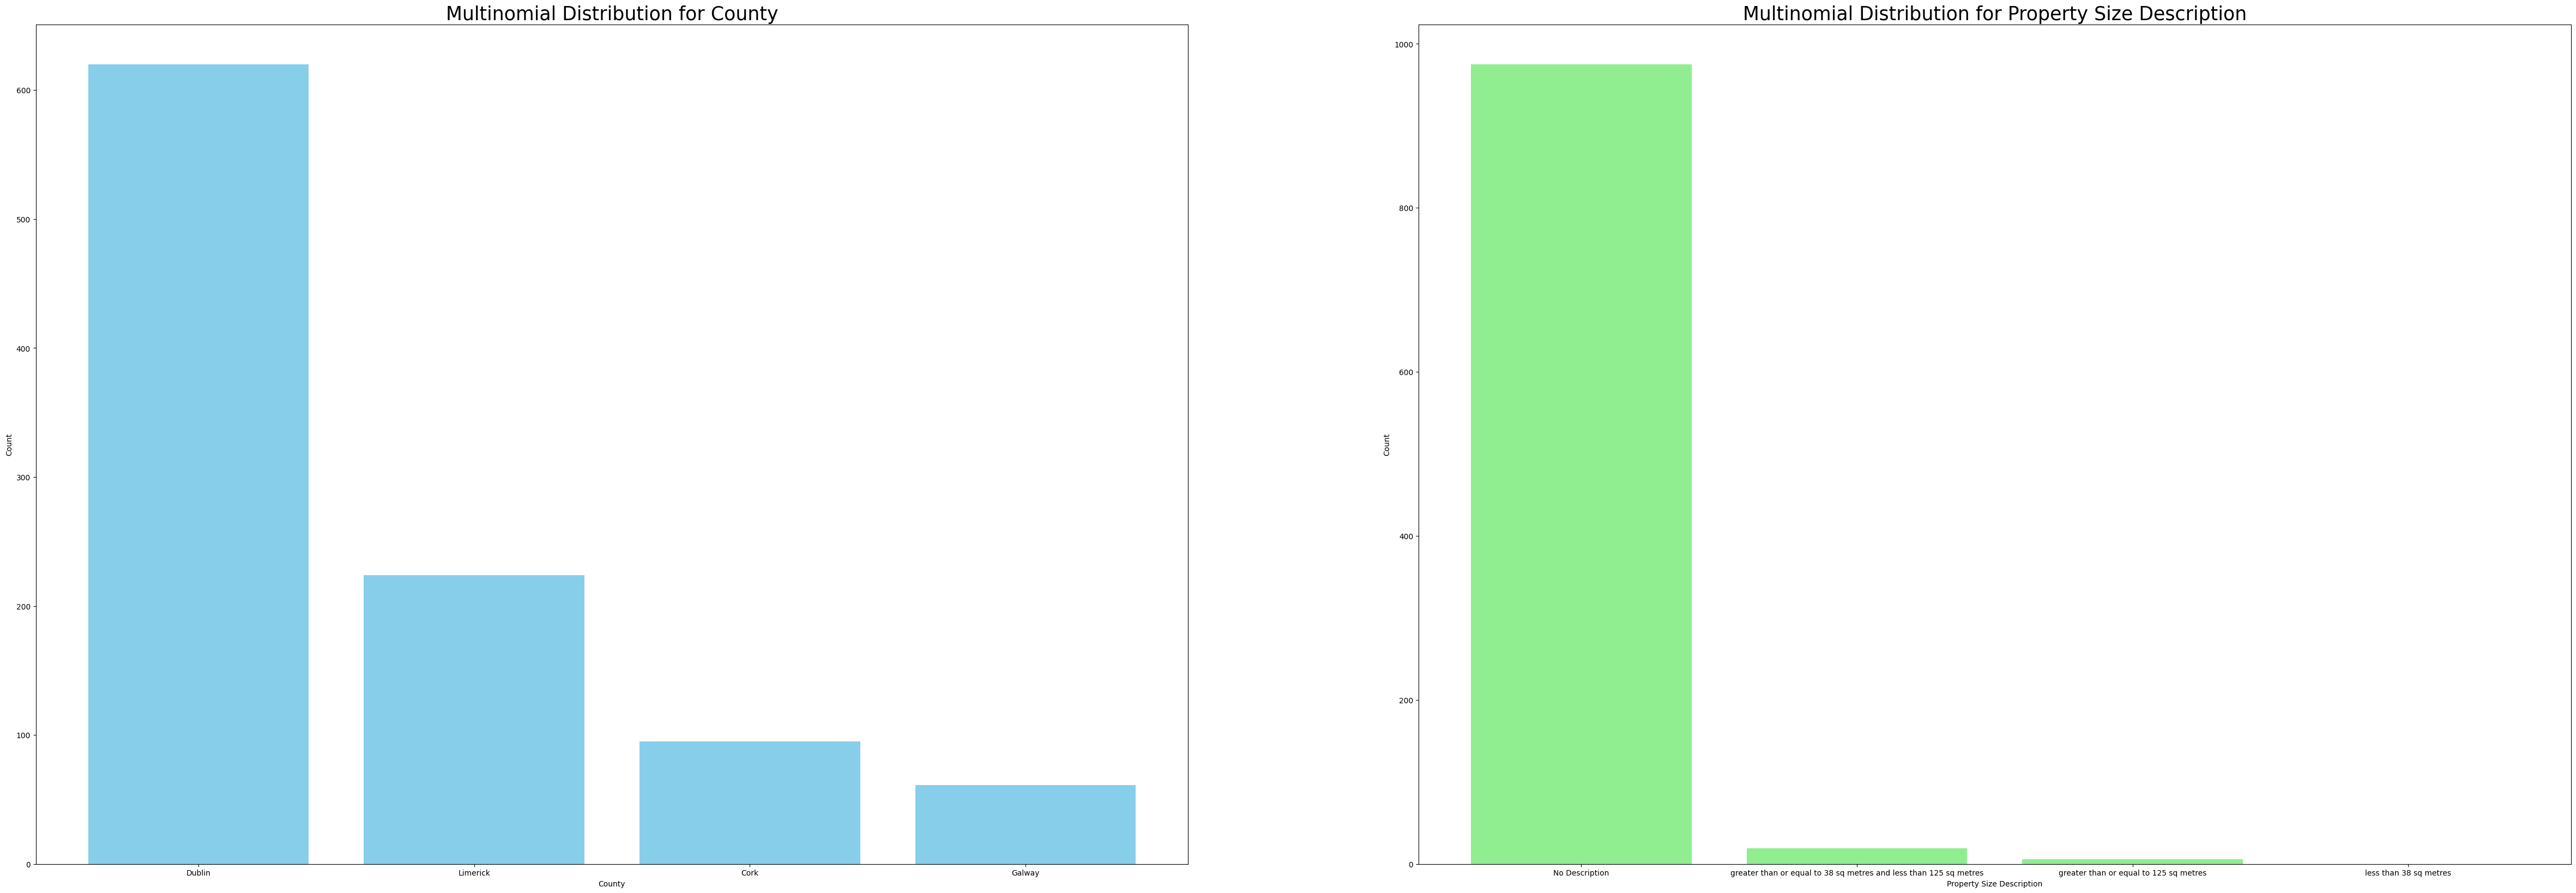

In [40]:
county_categories = new_df['County'].unique()
county_probabilities = (new_df['County'].value_counts() / len(new_df)).values

prop_size_categories = new_df['Property_Size_Description'].unique()
prop_size_probabilities = (new_df['Property_Size_Description'].value_counts() / len(new_df)).values

num_trials = 1000 

multinomial_samples = np.random.multinomial(num_trials, county_probabilities)
multinomial = np.random.multinomial(num_trials, prop_size_probabilities)

# Create bar charts to visualize the multinomial distribution
plt.figure(figsize=(60, 20))

plt.subplot(1, 2, 1)
plt.bar(county_categories, multinomial_samples, color='skyblue')
plt.title("Multinomial Distribution for County", fontsize=25)
plt.xlabel("County")
plt.ylabel("Count")

plt.subplot(1, 2, 2)
plt.bar(prop_size_categories, multinomial, color='lightgreen')
plt.title("Multinomial Distribution for Property Size Description", fontsize=25)
plt.xlabel("Property Size Description")
plt.ylabel("Count")
plt.savefig("Multinomial distribution for Categorical Variable")
plt.show()


The Description_of_Property provides an example where the binomial distribution is applicable. Much like the Multinomial distribution, the binomial distribution operates under the assumptions of a fixed number of trials or events, denoted as $n$, and the independence of each trial or event. Within this distribution, a probability $p$ indicates the likelihood of success, such as the probability of a property being a New Dwelling house /Apartment in the context of Description_of_Property attribute. Consequently, the probability of failure is represented as $1−p$. The binomial distribution is primarily employed to model the count of successes, such as the count of new Property, within the specified number of trials[26].

In [94]:
n = 1000  # Number of trials
p = 0.18  # Probability of success (for a 'New Dwelling house /Apartment')
success = 1  # Number of New Dwelling house /Apartment in each trial

# Generate random samples using the binomial distribution
house_prob = sum(np.random.binomial(n=success, p=p, size=n)== 1)/n

print(f'The probability to successfuly choose a New Dwelling house /Apartment is {house_prob:.2%}')

#https://www.askpython.com/python/examples/print-a-percentage-value-in-python


The probability to successfuly choose a New Dwelling house /Apartment is 20.00%


let's viualize the Binomial Distribution:

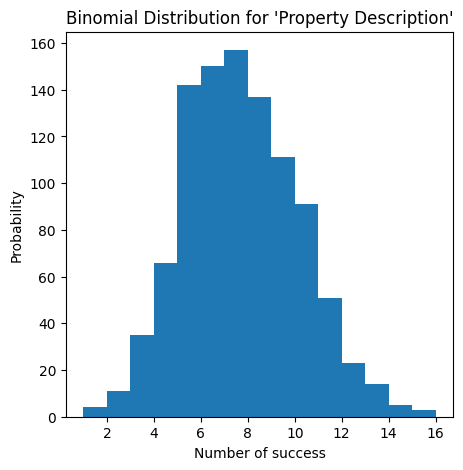

In [43]:
n = 1000  # Number of trials
p = 0.18  # Probability of success (for a 'New Dwelling house /Apartment')
success = 40  # Number of New Dwelling house /Apartment in each trial

house_prob = np.random.binomial(n=success, p=p, size=n)
fig, axs = plt.subplots(1, 1, figsize =(5,5))
axs.hist(house_prob, bins = 15)
plt.title("Binomial Distribution for 'Property Description'")
plt.xlabel("Number of success")
plt.ylabel("Probability")
plt.savefig("Binomial distribution for Property Description Attribute")
plt.show()

#### Numerical Variables

For numerical variables, the `describe()` function is used to provide a comprehensive summary of key statistical measures. When applied to a numerical variable in a dataset, describe() furnishes the following information: Count (The number of non-null observations), Mean(The average value, indicating the central tendency of the), Standard Deviation (A measure of the dispersion or spread of the data), Minimum (The smallest observed value in the dataset), 25th/50th/75th Percentile (The value below which 25%/50%/75% of the data falls), Maximum (The largest observed value in the dataset)[27].

In [44]:
new_df.describe()

,Date,Price,Full_Market_Price,VAT_Exclusive
count,151052,1.510520e+05,151052.000000,151052.000000
mean,2020-09-10 00:28:35.393374464,3.804035e+05,0.045719,0.179806
min,2018-01-02 00:00:00,5.030530e+03,0.000000,0.000000
25%,2019-04-30 00:00:00,2.250000e+05,0.000000,0.000000
50%,2020-10-07 00:00:00,3.100000e+05,0.000000,0.000000
75%,2022-01-21 00:00:00,4.317181e+05,0.000000,0.000000
max,2023-05-12 00:00:00,1.480000e+07,1.000000,1.000000
std,NaN,3.442758e+05,0.208876,0.384027


### References

[1]: Chugh v., (2023). "*Python pandas tutorial: The ultimate guide for beginners*".[Datacamp](https://www.datacamp.com/tutorial/pandas)

[2]: matplotlib, (n.d.). "*matplotlib.pyplot*". [matplotlib](https://matplotlib.org/3.5.3/api/_as_gen/matplotlib.pyplot.html)

[3]: Zach, (2021). "*The Easiest Way to Use NumPy: import numpy as np*". [Statology](https://www.statology.org/import-numpy-as-np/#:~:text=The%20import%20numpy%20portion%20of,function_name%20rather%20than%20numpy.)

[4]:Scipy, (n.d.). "*Statistical functions (scipy.stats)*". [Scipy](https://docs.scipy.org/doc/scipy/reference/stats.html#module-scipy.stats)

[5]: Analyseup, (n.d.). "*Importing Data with Pandas*". [Analyseup](https://www.analyseup.com/learn-python-for-data-science/python-pandas-importing-data.html)

[6]: Shazra H., (2023). "*head () and tail () Functions Explained with Examples and Codes*". [Analytics Vidhya](https://www.analyticsvidhya.com/blog/2023/07/head-and-tail-functions/)

[7]: Pandas, (n.d.). "*pandas.DataFrame.shape*".[Pandas](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.shape.html)

[8]: Rajan S., (2023). "*Python | Pandas dataframe.info()*". [geeksforgeeks](https://www.geeksforgeeks.org/python-pandas-dataframe-info/)

[9]: Moffitt C., (2018). "*Overview of Pandas Data Types*". [Practical Business Python](https://pbpython.com/pandas_dtypes.html#:~:text=An%20object%20is%20a%20string,df)

[10]: stackoverflow, (2014). "*Convert Pandas Column to DateTime*". [stackoverflow](https://stackoverflow.com/questions/26763344/convert-pandas-column-to-datetime)

[11]: Data to Fish, (2021). "*Select all Rows with NaN Values in Pandas DataFrame*". [Data to Fish](https://datatofish.com/rows-with-nan-pandas-dataframe/)

[12]: Lynn S., (n.d.). "*Delete Rows & Columns in DataFrames Quickly using Pandas Drop*".[Shane Lynn](https://www.shanelynn.ie/pandas-drop-delete-dataframe-rows-columns/)

[13]: Welck Aj, (n.d.). "*How to Check If Any Value is NaN in a Pandas DataFrame*". [Chartio](https://chartio.com/resources/tutorials/how-to-check-if-any-value-is-nan-in-a-pandas-dataframe/)

[14]:Shashank S., (2023). "*Defining, Analysing, and Implementing Imputation Techniques*". [Analytics Vidhya](https://www.analyticsvidhya.com/blog/2021/06/defining-analysing-and-implementing-imputation-techniques/)

[15]: Kirch, Wilhelm, ed. (2008). "*Level of Measurement*". Encyclopedia of Public Health. [Springer Link](https://link.springer.com/referenceworkentry/10.1007/978-1-4020-5614-7_1971)

[16]: DATAtab Team (2023). "*Level of measurement*". [DATAtab: Online Statistics Calculator](https://datatab.net/tutorial/level-of-measurement)

[17]: GraphPad, (n.d.). "*What is the difference between ordinal, interval and ratio variables? Why should I care?*". [GraphPad](https://www.graphpad.com/support/faq/what-is-the-difference-between-ordinal-interval-and-ratio-variables-why-should-i-care/)

[18]: Stevens S.S., (1946). "*On the Theory of Scales of Measurement*". Science, Volum. 103, No. 2684

[19]: Bhat A., (n.d.). "*Levels of Measurement: Nominal, Ordinal, Interval & Ratio*". [QuestionPro](https://www.questionpro.com/blog/nominal-ordinal-interval-ratio/)

[20]: Statgraphics19, (n.d.). "*Categorical Data Analysis*". [Statgraphics19](https://www.statgraphics.com/categorical-data-analysis#:~:text=The%20Frequency%20Tables%20procedure%20analyzes,a%20set%20of%20multinomial%20probabilities.)

[21]: Ebner J., (2020). "*How to Use Pandas Unique to Get Unique Values*". [Sharp Sight](https://www.sharpsightlabs.com/blog/pandas-unique/)

[22]: yuktijain, (n.d.). "*How to replace multiple substrings of a string in Python?*". [Study Tonight](https://www.studytonight.com/python-howtos/how-to-replace-multiple-substrings-of-a-string-in-python)

[23]:  Bhalla D., (n.d.). "*PYTHON : 10 WAYS TO FILTER PANDAS DATAFRAME*". [Listen Data](https://www.listendata.com/2019/07/how-to-filter-pandas-dataframe.html)

[24]: Zach, (2021). "*What is a Categorical Distribution?*". [Statology](https://www.statology.org/categorical-distribution/)

[25]: Statistics How to, (n.d.). "*Multinomial Distribution: Definition, Examples*". [Statistics How to](https://www.statisticshowto.com/multinomial-distribution/)

[26]: CueMath, (n.d.). "*Binomial Distribution*". [CueMath](https://www.cuemath.com/algebra/binomial-distribution/)

[27]: W3 School, (n.d.). "*Pandas DataFrame describe() Method*". [W3 School](https://www.w3schools.com/python/pandas/ref_df_describe.asp#:~:text=The%20describe()%20method%20returns,std%20%2D%20The%20standard%20deviation)


### Additional readings

- Stackoverflow, (2020). "*Python how to fix year out of range error*".[stackoverflow](https://stackoverflow.com/questions/62130640/python-how-to-fix-year-out-of-range-error)
- Stackoverflow, (2017). "*Understanding inplace=True in pandas*". [Stackoverflow](https://stackoverflow.com/questions/43893457/understanding-inplace-true-in-pandas)
- matplotlib, (n.d.). "*matplotlib.pyplot.pie*". [matplotlib](https://matplotlib.org/3.5.3/api/_as_gen/matplotlib.pyplot.pie.html)
- Amipara K., (2017). "*Better visualization of Pie charts by MatPlotLib*".[Medium](https://medium.com/@kvnamipara/a-better-visualisation-of-pie-charts-by-matplotlib-935b7667d77f)
- Stackoverflow, (2020). "*How to plot 3 plots simultaneously in one plot?*". [Stackoverflow](https://stackoverflow.com/questions/61547691/how-to-plot-3-plots-simultaneously-in-one-plot)
- Numpy (n.d.). "*numpy.random.multinomial*". [Numpy](https://numpy.org/doc/stable/reference/random/generated/numpy.random.multinomial.html)
- Numpy (n.d.). "*numpy.random.binomial*". [Numpy](https://numpy.org/doc/stable/reference/random/generated/numpy.random.binomial.html)
- parasmadan15, (n.d.). "*Display the Pandas DataFrame in table style*". [Geeks for Geeks](https://www.geeksforgeeks.org/display-the-pandas-dataframe-in-table-style/)

***
End